# Prepocessing the data

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
cols="""duration,
protocol_type,
service,
flag,
src_bytes,
dst_bytes,
land,
wrong_fragment,
urgent,
hot,
num_failed_logins,
logged_in,
num_compromised,
root_shell,
su_attempted,
num_root,
num_file_creations,
num_shells,
num_access_files,
num_outbound_cmds,
is_host_login,
is_guest_login,
count,
srv_count,
serror_rate,
srv_serror_rate,
rerror_rate,
srv_rerror_rate,
same_srv_rate,
diff_srv_rate,
srv_diff_host_rate,
dst_host_count,
dst_host_srv_count,
dst_host_same_srv_rate,
dst_host_diff_srv_rate,
dst_host_same_src_port_rate,
dst_host_srv_diff_host_rate,
dst_host_serror_rate,
dst_host_srv_serror_rate,
dst_host_rerror_rate,
dst_host_srv_rerror_rate"""

columns=[]
for c in cols.split(','):
    if(c.strip()):
       columns.append(c.strip())

columns.append('target')
#print(columns)
print(len(columns))

42


In [38]:
attacks_types = {
    'normal': 'normal',
'back': 'dos',
'buffer_overflow': 'u2r',
'ftp_write': 'r2l',
'guess_passwd': 'r2l',
'imap': 'r2l',
'ipsweep': 'probe',
'land': 'dos',
'loadmodule': 'u2r',
'multihop': 'r2l',
'neptune': 'dos',
'nmap': 'probe',
'perl': 'u2r',
'phf': 'r2l',
'pod': 'dos',
'portsweep': 'probe',
'rootkit': 'u2r',
'satan': 'probe',
'smurf': 'dos',
'spy': 'r2l',
'teardrop': 'dos',
'warezclient': 'r2l',
'warezmaster': 'r2l',
}

In [39]:
path = "./data/kddcup.data_10_percent.gz"
df = pd.read_csv(path,names=columns)

#Adding Attack Type column
df['Attack Type'] = df.target.apply(lambda r:attacks_types[r[:-1]])

df.head()

duration protocol_type service flag  src_bytes  dst_bytes  land  \
0         0           tcp    http   SF        181       5450     0   
1         0           tcp    http   SF        239        486     0   
2         0           tcp    http   SF        235       1337     0   
3         0           tcp    http   SF        219       1337     0   
4         0           tcp    http   SF        217       2032     0   

   wrong_fragment  urgent  hot  ...  dst_host_same_srv_rate  \
0               0       0    0  ...                     1.0   
1               0       0    0  ...                     1.0   
2               0       0    0  ...                     1.0   
3               0       0    0  ...                     1.0   
4               0       0    0  ...                     1.0   

   dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                     0.0                         0.11   
1                     0.0                         0.05   
2                     0.0                         0.03   
3                     0.0                         0.03   
4                     0.0                         0.02   

   dst_host_srv_diff_host_rate  dst_host_serror_rate  \
0                          0.0                   0.0   
1                          0.0                   0.0   
2                          0.0                   0.0   
3                          0.0                   0.0   
4                          0.0                   0.0   

   dst_host_srv_serror_rate  dst_host_rerror_rate  dst_host_srv_rerror_rate  \
0                       0.0                   0.0                       0.0   
1                       0.0                   0.0                       0.0   
2                       0.0                   0.0                       0.0   
3                       0.0                   0.0                       0.0   
4                       0.0                   0.0                       0.0   

    target  Attack Type  
0  normal.       normal  
1  normal.       normal  
2  normal.       normal  
3  normal.       normal  
4  normal.       normal  

[5 rows x 43 columns]

In [40]:
df['Attack Type'].value_counts()

Attack Type
dos       391458
normal     97278
probe       4107
r2l         1126
u2r           52
Name: count, dtype: int64

# Visualizing the data

In [41]:
#Visualization
def bar_graph(feature):
    df[feature].value_counts().plot(kind="bar")

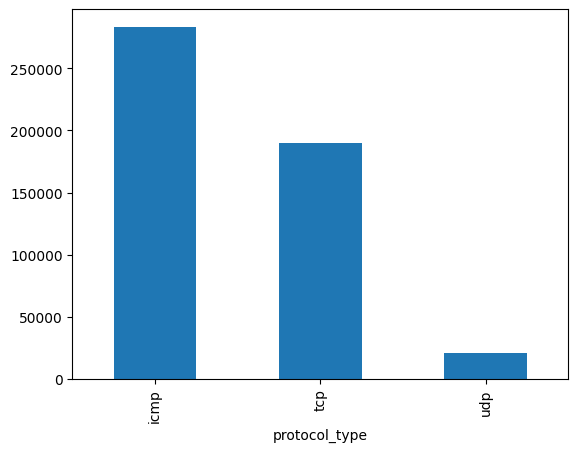

In [42]:
bar_graph('protocol_type')

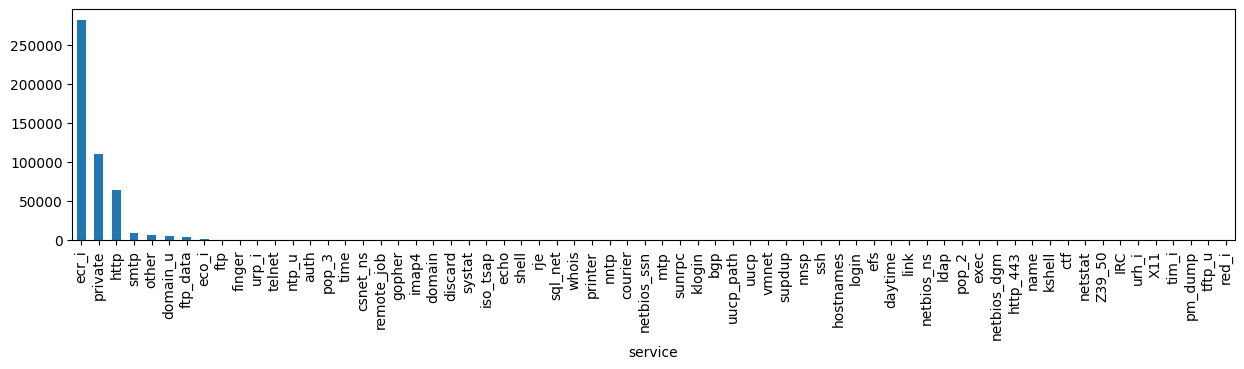

In [43]:
plt.figure(figsize=(15,3))
bar_graph('service')

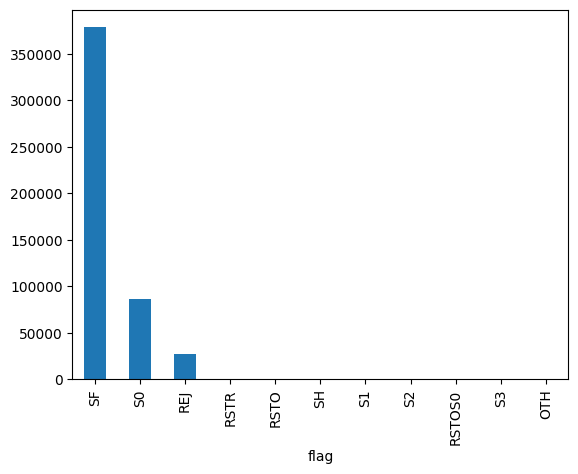

In [44]:
bar_graph('flag')

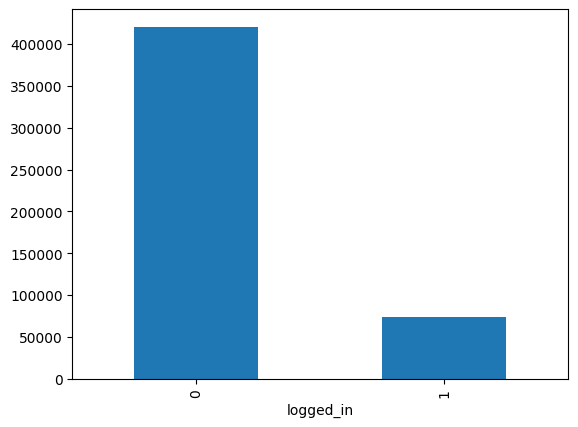

In [45]:
bar_graph('logged_in')

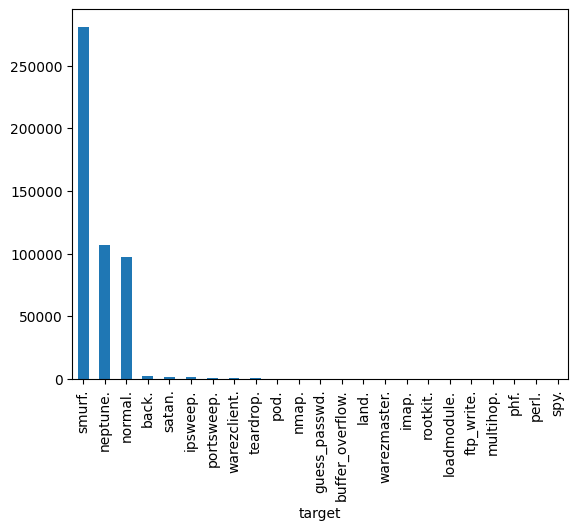

In [46]:
bar_graph('target')

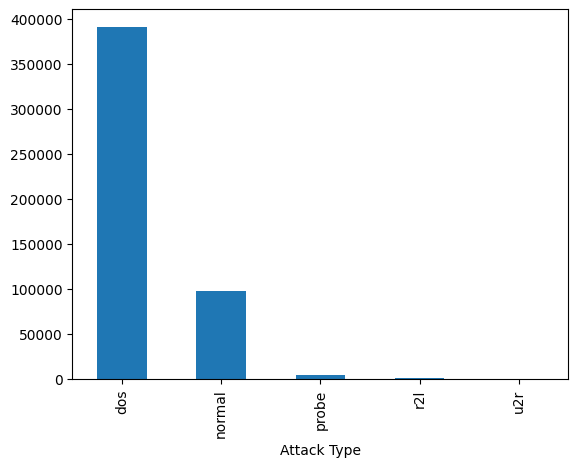

In [47]:
bar_graph('Attack Type')

In [48]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'target', 'Attack Type'],
      dtype='object')

# Removing highly correlated columns

In [49]:
df.head(100)

duration protocol_type service flag  src_bytes  dst_bytes  land  \
0          0           tcp    http   SF        181       5450     0   
1          0           tcp    http   SF        239        486     0   
2          0           tcp    http   SF        235       1337     0   
3          0           tcp    http   SF        219       1337     0   
4          0           tcp    http   SF        217       2032     0   
..       ...           ...     ...  ...        ...        ...   ...   
95         0           tcp    http   SF        337        330     0   
96         0           tcp    http   SF        293      38125     0   
97         0           tcp    http   SF        171        280     0   
98         0           tcp    http   SF        178       1973     0   
99         0           tcp    http   SF        331       8415     0   

    wrong_fragment  urgent  hot  ...  dst_host_same_srv_rate  \
0                0       0    0  ...                     1.0   
1                0       0    0  ...                     1.0   
2                0       0    0  ...                     1.0   
3                0       0    0  ...                     1.0   
4                0       0    0  ...                     1.0   
..             ...     ...  ...  ...                     ...   
95               0       0    0  ...                     1.0   
96               0       0    0  ...                     1.0   
97               0       0    0  ...                     1.0   
98               0       0    0  ...                     1.0   
99               0       0    0  ...                     1.0   

    dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                      0.0                         0.11   
1                      0.0                         0.05   
2                      0.0                         0.03   
3                      0.0                         0.03   
4                      0.0                         0.02   
..                     ...                          ...   
95                     0.0                         0.08   
96                     0.0                         0.05   
97                     0.0                         0.17   
98                     0.0                         0.06   
99                     0.0                         0.04   

    dst_host_srv_diff_host_rate  dst_host_serror_rate  \
0                          0.00                   0.0   
1                          0.00                   0.0   
2                          0.00                   0.0   
3                          0.00                   0.0   
4                          0.00                   0.0   
..                          ...                   ...   
95                         0.01                   0.0   
96                         0.01                   0.0   
97                         0.02                   0.0   
98                         0.02                   0.0   
99                         0.02                   0.0   

    dst_host_srv_serror_rate  dst_host_rerror_rate  dst_host_srv_rerror_rate  \
0                        0.0                   0.0                       0.0   
1                        0.0                   0.0                       0.0   
2                        0.0                   0.0                       0.0   
3                        0.0                   0.0                       0.0   
4                        0.0                   0.0                       0.0   
..                       ...                   ...                       ...   
95                       0.0                   0.0                       0.0   
96                       0.0                   0.0                       0.0   
97                       0.0                   0.0                       0.0   
98                       0.0                   0.0                       0.0   
99                       0.0                   0.0                       0.0   

     target  Attack Type  


In [50]:
df = df.dropna(axis=1)# drop columns with NaN

df = df[[col for col in df if df[col].nunique() > 1]]# keep columns where there are more than 1 unique values



In [51]:
df.head(100)

duration protocol_type service flag  src_bytes  dst_bytes  land  \
0          0           tcp    http   SF        181       5450     0   
1          0           tcp    http   SF        239        486     0   
2          0           tcp    http   SF        235       1337     0   
3          0           tcp    http   SF        219       1337     0   
4          0           tcp    http   SF        217       2032     0   
..       ...           ...     ...  ...        ...        ...   ...   
95         0           tcp    http   SF        337        330     0   
96         0           tcp    http   SF        293      38125     0   
97         0           tcp    http   SF        171        280     0   
98         0           tcp    http   SF        178       1973     0   
99         0           tcp    http   SF        331       8415     0   

    wrong_fragment  urgent  hot  ...  dst_host_same_srv_rate  \
0                0       0    0  ...                     1.0   
1                0       0    0  ...                     1.0   
2                0       0    0  ...                     1.0   
3                0       0    0  ...                     1.0   
4                0       0    0  ...                     1.0   
..             ...     ...  ...  ...                     ...   
95               0       0    0  ...                     1.0   
96               0       0    0  ...                     1.0   
97               0       0    0  ...                     1.0   
98               0       0    0  ...                     1.0   
99               0       0    0  ...                     1.0   

    dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                      0.0                         0.11   
1                      0.0                         0.05   
2                      0.0                         0.03   
3                      0.0                         0.03   
4                      0.0                         0.02   
..                     ...                          ...   
95                     0.0                         0.08   
96                     0.0                         0.05   
97                     0.0                         0.17   
98                     0.0                         0.06   
99                     0.0                         0.04   

    dst_host_srv_diff_host_rate  dst_host_serror_rate  \
0                          0.00                   0.0   
1                          0.00                   0.0   
2                          0.00                   0.0   
3                          0.00                   0.0   
4                          0.00                   0.0   
..                          ...                   ...   
95                         0.01                   0.0   
96                         0.01                   0.0   
97                         0.02                   0.0   
98                         0.02                   0.0   
99                         0.02                   0.0   

    dst_host_srv_serror_rate  dst_host_rerror_rate  dst_host_srv_rerror_rate  \
0                        0.0                   0.0                       0.0   
1                        0.0                   0.0                       0.0   
2                        0.0                   0.0                       0.0   
3                        0.0                   0.0                       0.0   
4                        0.0                   0.0                       0.0   
..                       ...                   ...                       ...   
95                       0.0                   0.0                       0.0   
96                       0.0                   0.0                       0.0   
97                       0.0                   0.0                       0.0   
98                       0.0                   0.0                       0.0   
99                       0.0                   0.0                       0.0   

     target  Attack Type  


In [52]:
df.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate                float64
rerror_rate                    float64
srv_rerror_rate          

In [53]:
from sklearn.preprocessing import LabelEncoder

# Apply LabelEncoder to all object (string) columns
for col in df.select_dtypes(include=['object', 'category']).columns:
    df[col] = LabelEncoder().fit_transform(df[col])

In [54]:
df.head(100)

duration  protocol_type  service  flag  src_bytes  dst_bytes  land  \
0          0              1       22     9        181       5450     0   
1          0              1       22     9        239        486     0   
2          0              1       22     9        235       1337     0   
3          0              1       22     9        219       1337     0   
4          0              1       22     9        217       2032     0   
..       ...            ...      ...   ...        ...        ...   ...   
95         0              1       22     9        337        330     0   
96         0              1       22     9        293      38125     0   
97         0              1       22     9        171        280     0   
98         0              1       22     9        178       1973     0   
99         0              1       22     9        331       8415     0   

    wrong_fragment  urgent  hot  ...  dst_host_same_srv_rate  \
0                0       0    0  ...                     1.0   
1                0       0    0  ...                     1.0   
2                0       0    0  ...                     1.0   
3                0       0    0  ...                     1.0   
4                0       0    0  ...                     1.0   
..             ...     ...  ...  ...                     ...   
95               0       0    0  ...                     1.0   
96               0       0    0  ...                     1.0   
97               0       0    0  ...                     1.0   
98               0       0    0  ...                     1.0   
99               0       0    0  ...                     1.0   

    dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                      0.0                         0.11   
1                      0.0                         0.05   
2                      0.0                         0.03   
3                      0.0                         0.03   
4                      0.0                         0.02   
..                     ...                          ...   
95                     0.0                         0.08   
96                     0.0                         0.05   
97                     0.0                         0.17   
98                     0.0                         0.06   
99                     0.0                         0.04   

    dst_host_srv_diff_host_rate  dst_host_serror_rate  \
0                          0.00                   0.0   
1                          0.00                   0.0   
2                          0.00                   0.0   
3                          0.00                   0.0   
4                          0.00                   0.0   
..                          ...                   ...   
95                         0.01                   0.0   
96                         0.01                   0.0   
97                         0.02                   0.0   
98                         0.02                   0.0   
99                         0.02                   0.0   

    dst_host_srv_serror_rate  dst_host_rerror_rate  dst_host_srv_rerror_rate  \
0                        0.0                   0.0                       0.0   
1                        0.0                   0.0                       0.0   
2                        0.0                   0.0                       0.0   
3                        0.0                   0.0                       0.0   
4                        0.0                   0.0                       0.0   
..                       ...                   ...                       ...   
95                       0.0                   0.0                       0.0   
96                       0.0                   0.0                       0.0   
97                       0.0                   0.0                       0.0   
98                       0.0                   0.0                       0.0   
99                       0.0                   0.0                      

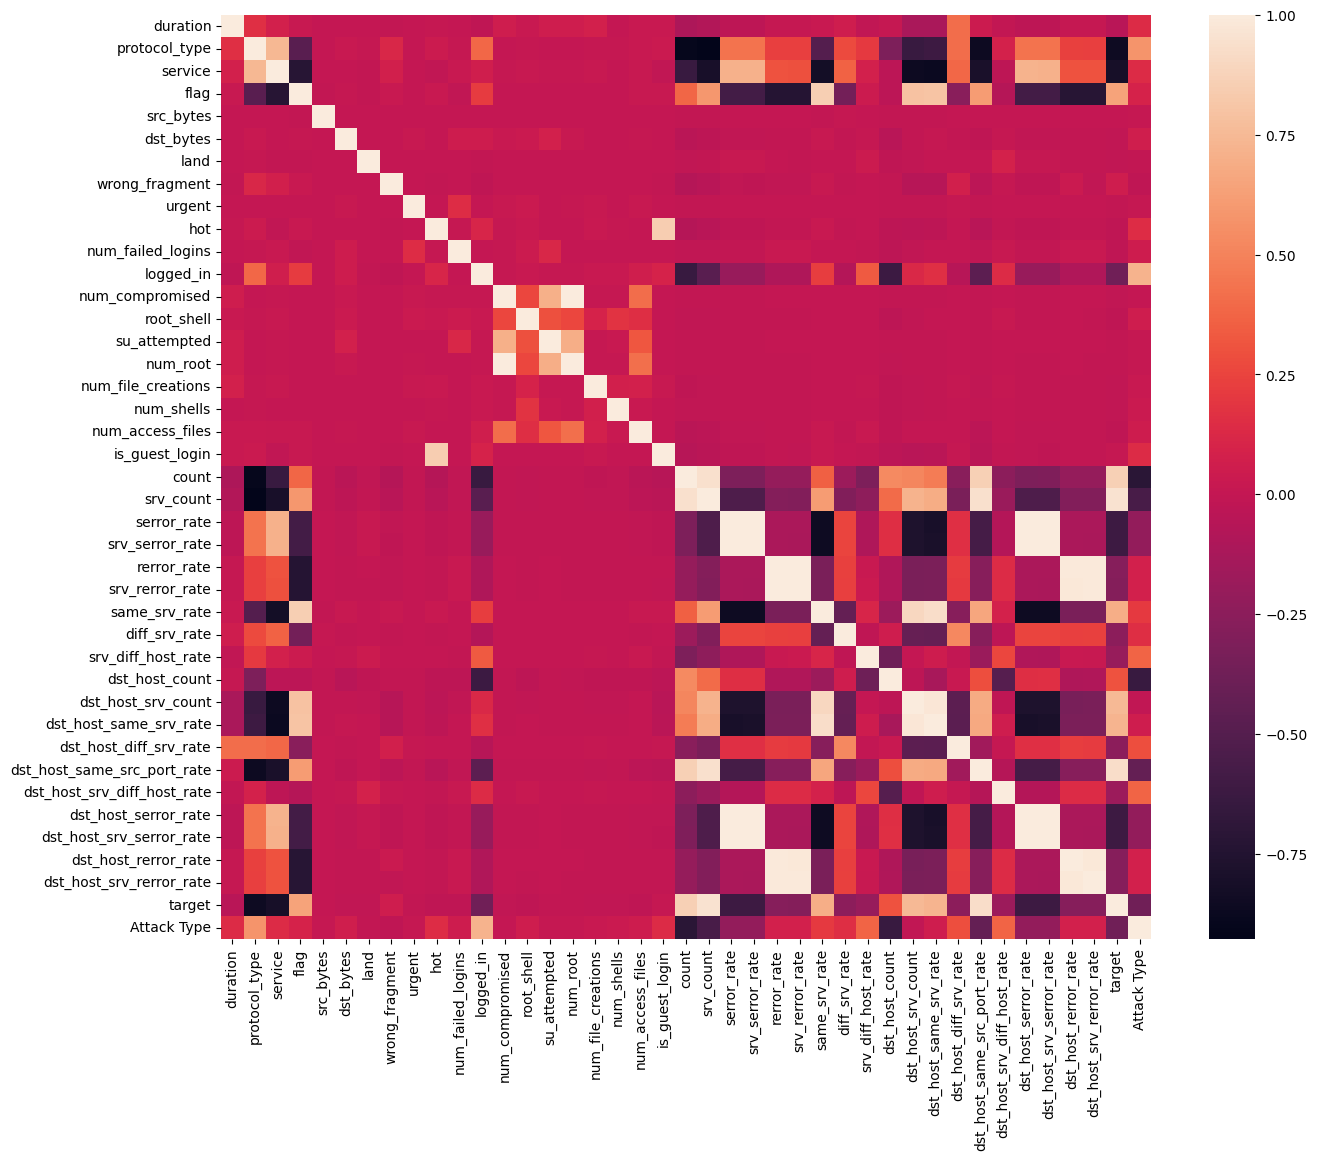

In [55]:


# Now compute the correlation

corr = df.corr()

plt.figure(figsize=(15,12))

sns.heatmap(corr)

plt.show()

# Label encoding the features

In [ ]:
df.drop('service',axis = 1,inplace= True)

In [ ]:
df.head(5)

# Neural Networks 

## Preparing Data

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

In [57]:
import tensorflow as tf
from keras.models import Sequential, Model
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, Input, Concatenate, Add

In [58]:
df = df.drop(['target',], axis=1)
print(df.shape)

# Target variable and train set
Y = df[['Attack Type']]
X = df.drop(['Attack Type',], axis=1)

sc = MinMaxScaler()
X = sc.fit_transform(X)

# Split test and train data 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(494021, 40)
(330994, 39) (163027, 39)
(330994, 1) (163027, 1)


In [59]:
pd.read_csv("ids.csv")

duration  protocol_type  flag  src_bytes  dst_bytes  land  \
0              0              1     9        181       5450     0   
1              0              1     9        239        486     0   
2              0              1     9        235       1337     0   
3              0              1     9        219       1337     0   
4              0              1     9        217       2032     0   
...          ...            ...   ...        ...        ...   ...   
494016         0              1     9        310       1881     0   
494017         0              1     9        282       2286     0   
494018         0              1     9        203       1200     0   
494019         0              1     9        291       1200     0   
494020         0              1     9        219       1234     0   

        wrong_fragment  urgent  hot  num_failed_logins  ...  rerror_rate  \
0                    0       0    0                  0  ...          0.0   
1                    0       0    0                  0  ...          0.0   
2                    0       0    0                  0  ...          0.0   
3                    0       0    0                  0  ...          0.0   
4                    0       0    0                  0  ...          0.0   
...                ...     ...  ...                ...  ...          ...   
494016               0       0    0                  0  ...          0.0   
494017               0       0    0                  0  ...          0.0   
494018               0       0    0                  0  ...          0.0   
494019               0       0    0                  0  ...          0.0   
494020               0       0    0                  0  ...          0.0   

        same_srv_rate  diff_srv_rate  srv_diff_host_rate  dst_host_count  \
0                 1.0            0.0                0.00               9   
1                 1.0            0.0                0.00              19   
2                 1.0            0.0                0.00              29   
3                 1.0            0.0                0.00              39   
4                 1.0            0.0                0.00              49   
...               ...            ...                 ...             ...   
494016            1.0            0.0                0.40              86   
494017            1.0            0.0                0.00               6   
494018            1.0            0.0                0.17              16   
494019            1.0            0.0                0.17              26   
494020            1.0            0.0                0.14               6   

        dst_host_srv_count  dst_host_diff_srv_rate  \
0                        9                     0.0   
1                       19                     0.0   
2                       29                     0.0   
3                       39                     0.0   
4                       49                     0.0   
...                    ...                     ...   
494016                 255                     0.0   
494017                 255                     0.0   
494018                 255                     0.0   
494019                 255                     0.0   
494020                 255                     0.0   

        dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  Attack Type  
0                              0.11                         0.00            1  
1                              0.05                         0.00            1  
2                              0.03                         0.00            1  
3                              0.03                         0.00            1  
4                              0.02                         0.00            1  
...                             ...                          ...          ...  
494016                         0.01                         0.05            1  
494017                         0.17                         0.05

## Convolutional Neural Network (1)

                         +-----------------------------+
                         |         Input Layer         |
                         |        shape=(30, 1)        |
                         +-------------+---------------+
                                       |
                                       v
                         +-----------------------------+
                         |     Conv1D(24, kernel=3)     |
                         |        padding="same"       |
                         |        activation="relu"    |
                         +-------------+---------------+
                                       |
                                       v
                         +-----------------------------+
                         |        Dropout(0.5)         |
                         +-------------+---------------+
                                       |
                                       v
                         +-----------------------------+
                         |     Conv1D(24, kernel=3)     |
                         |        padding="same"       |
                         |        activation="relu"    |
                         +-------------+---------------+
                                       |
                                       v
                         +-----------------------------+
                         |        Dropout(0.5)         |
                         +-------------+---------------+
                                       |
                                       v
                         +-----------------------------+
                         |     Conv1D(48, kernel=3)     |
                         |        padding="same"       |
                         |        activation="relu"    |
                         +-------------+---------------+
                                       |
                                       v
                         +-----------------------------+
                         |       MaxPooling1D(pool=2)  |
                         +-------------+---------------+
                                       |
                                       v
                         +-----------------------------+
                         |          Flatten()          |
                         +-------------+---------------+
                                       |
                                       v
                         +-----------------------------+
                         |        Dropout(0.5)         |
                         +-------------+---------------+
                                       |
                                       v
                         +-----------------------------+
                         |     Dense(256, relu)        |
                         +-------------+---------------+
                                       |
                                       v
                         +-----------------------------+
                         |        Dropout(0.5)         |
                         +-------------+---------------+
                                       |
                                       v
                         +-----------------------------+
                         |     Dense(5, softmax)       |
                         +-------------+---------------+
                                       |
                                       v
                         +-----------------------------+
                         |     Final Dense(5, softmax) |
                         |        --> Output Layer     |
                         +-----------------------------+


In [60]:

inputs = Input(shape=(39, 1))
y = Conv1D(24, 3, padding="same", activation="relu", input_shape=(30,1))(inputs)

y = Dropout(0.5)(y)
y = Conv1D(24, 3, padding="same", activation="relu", input_shape=(30,1))(y)

y = Dropout(0.5)(y)
y = Conv1D(48, 3, padding="same", activation="relu", input_shape=(30,1))(inputs)
y = MaxPooling1D(pool_size=(2))(y)
y = Flatten()(y)
y = Dropout(0.5)(y)
y = Dense(256, activation="relu")(y)
y = Dropout(0.5)(y)
y = Dense(5, activation='softmax')(y)


outputs = Dense(5, activation='softmax')(y)
cnn_model = Model(inputs=inputs, outputs=outputs)


/home/dom/HDBW/ai-methods/hdbw.ai-methods.capstone/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Training

In [ ]:
import time
start = time.time()

cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
cnn_model.fit(X_train.reshape((-1,39,1)), Y_train.values.ravel(), epochs=2, batch_size=32)

print("time elapsed: ", time.time() - start)

Epoch 1/2
10344/10344 ━━━━━━━━━━━━━━━━━━━━ 39s 4ms/step - accuracy: 0.9923 - loss: 0.0383
Epoch 2/2
 4984/10344 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - accuracy: 0.9926 - loss: 0.0375

### Testing

In [63]:
cnn_preds_train = cnn_model.predict(X_train.reshape((-1,39,1)))
cnn_test = cnn_model.predict(X_test.reshape((-1,39,1)))
print("CONVOLUTIONAL NEURAL NETWORK")
print("Training Accuracy:", accuracy_score(Y_train, np.argmax(cnn_preds_train, axis=1)))
print("Testing Accuracy:", accuracy_score(Y_test, np.argmax(cnn_test, axis=1)))

10344/10344 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step
5095/5095 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step
CONVOLUTIONAL NEURAL NETWORK
Training Accuracy: 0.9929545550674634
Testing Accuracy: 0.9927987388592073


## Hybrid (Convolutional + Dense)

                         +-----------------------------+
                         |         Input Layer         |
                         |      shape=(30, 1)          |
                         +-------------+---------------+
                                       |
                                       v
                         +-----------------------------+
                         |      Conv1D(62, kernel=3)    |
                         |        padding="same"       |
                         |        activation="relu"    |
                         +-------------+---------------+
                                       |
                                       v
                         +-----------------------------+
                         |       MaxPooling1D(pool=2)  |
                         +-------------+---------------+
                                       |
                                       v
                         +-----------------------------+
                         |          Flatten()          |
                         +-------------+---------------+
                                       |
                                       v
                                  (y1 output saved)
                                       |
                                       v
                         +-----------------------------+
                         |        Dropout(0.5)         |
                         +-------------+---------------+
                                       |
                                       v
                         +-----------------------------+
                         |      Conv1D(62, kernel=3)    |
                         |        padding="same"       |
                         |        activation="relu"    |
                         +-------------+---------------+
                                       |
                                       v
                         +-----------------------------+
                         |       MaxPooling1D(pool=2)  |
                         +-------------+---------------+
                                       |
                                       v
                         +-----------------------------+
                         |          Flatten()          |
                         +-------------+---------------+
                                       |
                                       v
                                  (y2 output saved)
                                       |
                                       v
                         +-----------------------------+
                         |        Dropout(0.5)         |
                         +-------------+---------------+
                                       |
                                       v
                         +-----------------------------+
                         |     Conv1D(124, kernel=3)    |
                         |        padding="same"       |
                         |        activation="relu"    |
                         +-------------+---------------+
                                       |
                                       v
                         +-----------------------------+
                         |       MaxPooling1D(pool=2)  |
                         +-------------+---------------+
                                       |
                                       v
                         +-----------------------------+
                         |          Flatten()          |
                         +-------------+---------------+
                                       |
                                       v
                         +-----------------------------+
                         |        Dropout(0.5)         |
                         +-------------+---------------+
                                       |
                                       v
                         +-----------------------------+
                         |     Dense(256, relu)        |
                         +-------------+---------------+
                                       |
                                       v
                         +-----------------------------+
                         |        Dropout(0.5)         |
                         +-------------+---------------+
                                       |
                                       v
                         +-----------------------------+
                         |     Dense(5, softmax)       |
                         +-------------+---------------+
                                       |
                                       v
                               +-------------+
                               |             |
                               v             v
                            (y)      <-- Concatenate([y, y1, y2])
                                       |
                                       v
                         +-----------------------------+
                         |     Dense(5, softmax)       |
                         +-------------+---------------+
                                       |
                                       v
                         +-----------------------------+
                         |         Output Layer        |
                         |        shape=(5,)           |
                         +-----------------------------+


In [64]:

inputs = Input(shape=(39, 1))
y = Conv1D(62, 3, padding="same", activation="relu", input_shape=(39,1))(inputs)
y = MaxPooling1D(pool_size=(2))(y)
y1 = Flatten()(y)

y = Dropout(0.5)(y)
y = Conv1D(62, 3, padding="same", activation="relu", input_shape=(39,1))(inputs)
y = MaxPooling1D(pool_size=(2))(y)
y2 = Flatten()(y)

y = Dropout(0.5)(y)
y = Conv1D(124, 3, padding="same", activation="relu", input_shape=(39,1))(inputs)
y = MaxPooling1D(pool_size=(2))(y)
y = Flatten()(y)
y = Dropout(0.5)(y)
y = Dense(256, activation="relu")(y)
y = Dropout(0.5)(y)
y = Dense(5, activation='softmax')(y)

y = Concatenate()([y, y1, y2])

outputs = Dense(5, activation='softmax')(y)
cnn_model = Model(inputs=inputs, outputs=outputs)

/home/dom/HDBW/ai-methods/hdbw.ai-methods.capstone/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [65]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [66]:
import time
start = time.time()

cnn_model.fit(X_train.reshape((-1,39,1)), Y_train.values.ravel(), epochs=2, batch_size=32)

print("time elapsed: ", time.time() - start)


Epoch 1/2
10344/10344 ━━━━━━━━━━━━━━━━━━━━ 58s 5ms/step - accuracy: 0.9862 - loss: 0.0511
Epoch 2/2
10344/10344 ━━━━━━━━━━━━━━━━━━━━ 60s 6ms/step - accuracy: 0.9976 - loss: 0.0105
time elapsed:  117.26838994026184


In [67]:
cnn_preds_train = cnn_model.predict(X_train.reshape((-1,39,1)))
cnn_test = cnn_model.predict(X_test.reshape((-1,39,1)))
print("CONVOLUTIONAL NEURAL NETWORK")
print("Training Accuracy:", accuracy_score(Y_train, np.argmax(cnn_preds_train, axis=1)))
print("Testing Accuracy:", accuracy_score(Y_test, np.argmax(cnn_test, axis=1)))

10344/10344 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step
5095/5095 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step
CONVOLUTIONAL NEURAL NETWORK
Training Accuracy: 0.9974168716049233
Testing Accuracy: 0.9973133284670638


In [ ]:
## More batch_size

cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
cnn_model.fit(X_train.reshape((-1,39,1)), Y_train.values.ravel(), epochs=3, batch_size=1024)

In [ ]:
cnn_preds_train = cnn_model.predict(X_train.reshape((-1,30,1)))
cnn_test = cnn_model.predict(X_test.reshape((-1,30,1)))
print("CONVOLUTIONAL NEURAL NETWORK")
print("Training Accuracy:", accuracy_score(Y_train, np.argmax(cnn_preds_train, axis=1)))
print("Testing Accuracy:", accuracy_score(Y_test, np.argmax(cnn_test, axis=1)))

## Support Vector Machines

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Reshape inputs for SVM (flatten 30x1 to 30)
X_train_svm = X_train.reshape((-1, 30))
X_test_svm = X_test.reshape((-1, 30))


# Train SVM
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')  # You can tune these hyperparameters
svm_model.fit(X_train_svm, Y_train.values.ravel())

# Predict
svm_preds_train = svm_model.predict(X_train_svm)
svm_preds_test = svm_model.predict(X_test_svm)

# Evaluate
print("SUPPORT VECTOR MACHINE")
print("Training Accuracy:", accuracy_score(Y_train, svm_preds_train))
print("Testing Accuracy:", accuracy_score(Y_test, svm_preds_test))


# Save Processed Data

In [ ]:
# Reshape input from (n_samples, 30, 1) to (n_samples, 30)
X_train_flat = X_train.reshape(-1, 30)
X_test_flat = X_test.reshape(-1, 30)

# Save inputs
np.savetxt("data/X_train.csv", X_train_flat, delimiter=",")
np.savetxt("data/X_test.csv", X_test_flat, delimiter=",")

# Save labels (ensure 1D integer array)
np.savetxt("data/Y_train.csv", Y_train.values.ravel(), delimiter=",", fmt="%d")
np.savetxt("data/Y_test.csv", Y_test.values.ravel(), delimiter=",", fmt="%d")